## CUSTOMER CHURN PREDICTION

### IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer

### READING THE DATASET

In [2]:
df = pd.read_csv("C://Users//koner//Downloads//ccpg//Churn_Modelling.csv")

### EXPLORATORY DATA ANALYSIS (EDA)

In [3]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
df.tail()

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df.shape

(10000, 14)

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
df.sample(5)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
7439       7440    15812918     Scott          432    France  Female   27   
2389       2390    15711825     Ts'ai          655     Spain  Female   35   
1127       1128    15647301      Bray          549   Germany  Female   45   
1571       1572    15615012       Fan          594    France    Male   23   
3118       3119    15789432  Mazzanti          451    France    Male   33   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
7439       6   62339.81              2          0               0   
2389       1   82231.51              2          1               0   
1127       3  143734.01              2          1               1   
1571       5  156267.59              1          1               0   
3118       6       0.00              2          1               0   

      EstimatedSalary  Exited  
7439         53874.67       0  
2389         88798.02       0  
1127         96404.38       0  
1571        160968.44       0  
3118        184954.11       0

### DATA VISUALIZATION

#### HISTOGRAM

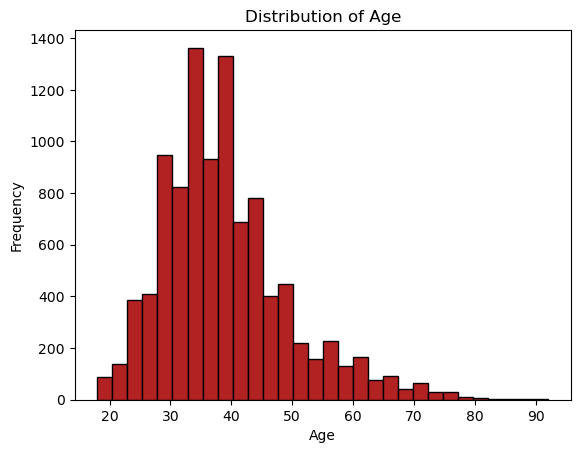

In [12]:
plt.hist(df['Age'], bins=30, color='Firebrick', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

#### SCATTERPLOT

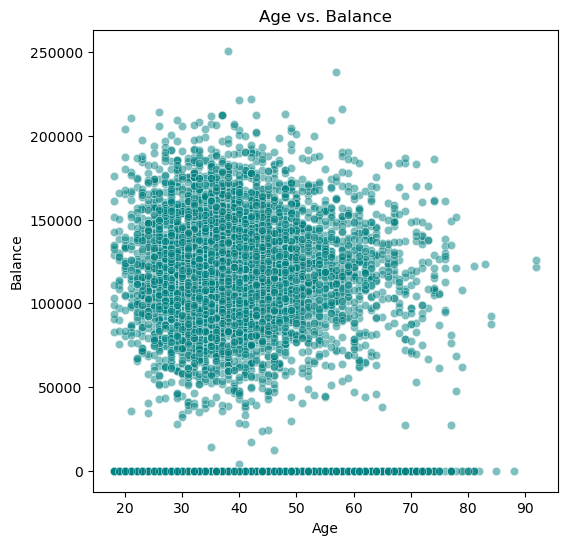

In [13]:
plt.figure(figsize=(6, 6))  
sns.scatterplot(data=df, x='Age', y='Balance', alpha=0.5, color='teal') 
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Age vs. Balance')
plt.show()

#### BOX PLOT

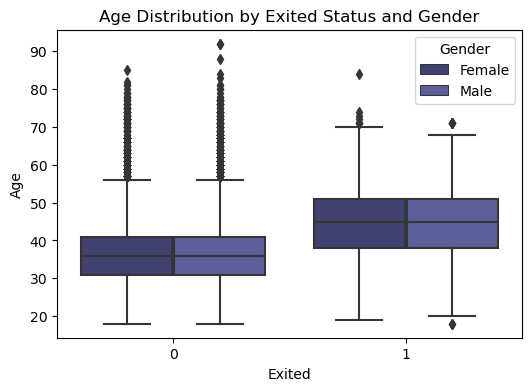

In [14]:
plt.figure(figsize=(6, 4))  
sns.boxplot(x='Exited', y='Age', hue='Gender', data=df, palette='tab20b') 
plt.xlabel('Exited')
plt.ylabel('Age')
plt.title('Age Distribution by Exited Status and Gender')
plt.show()

#### PAIR PLOT

C:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

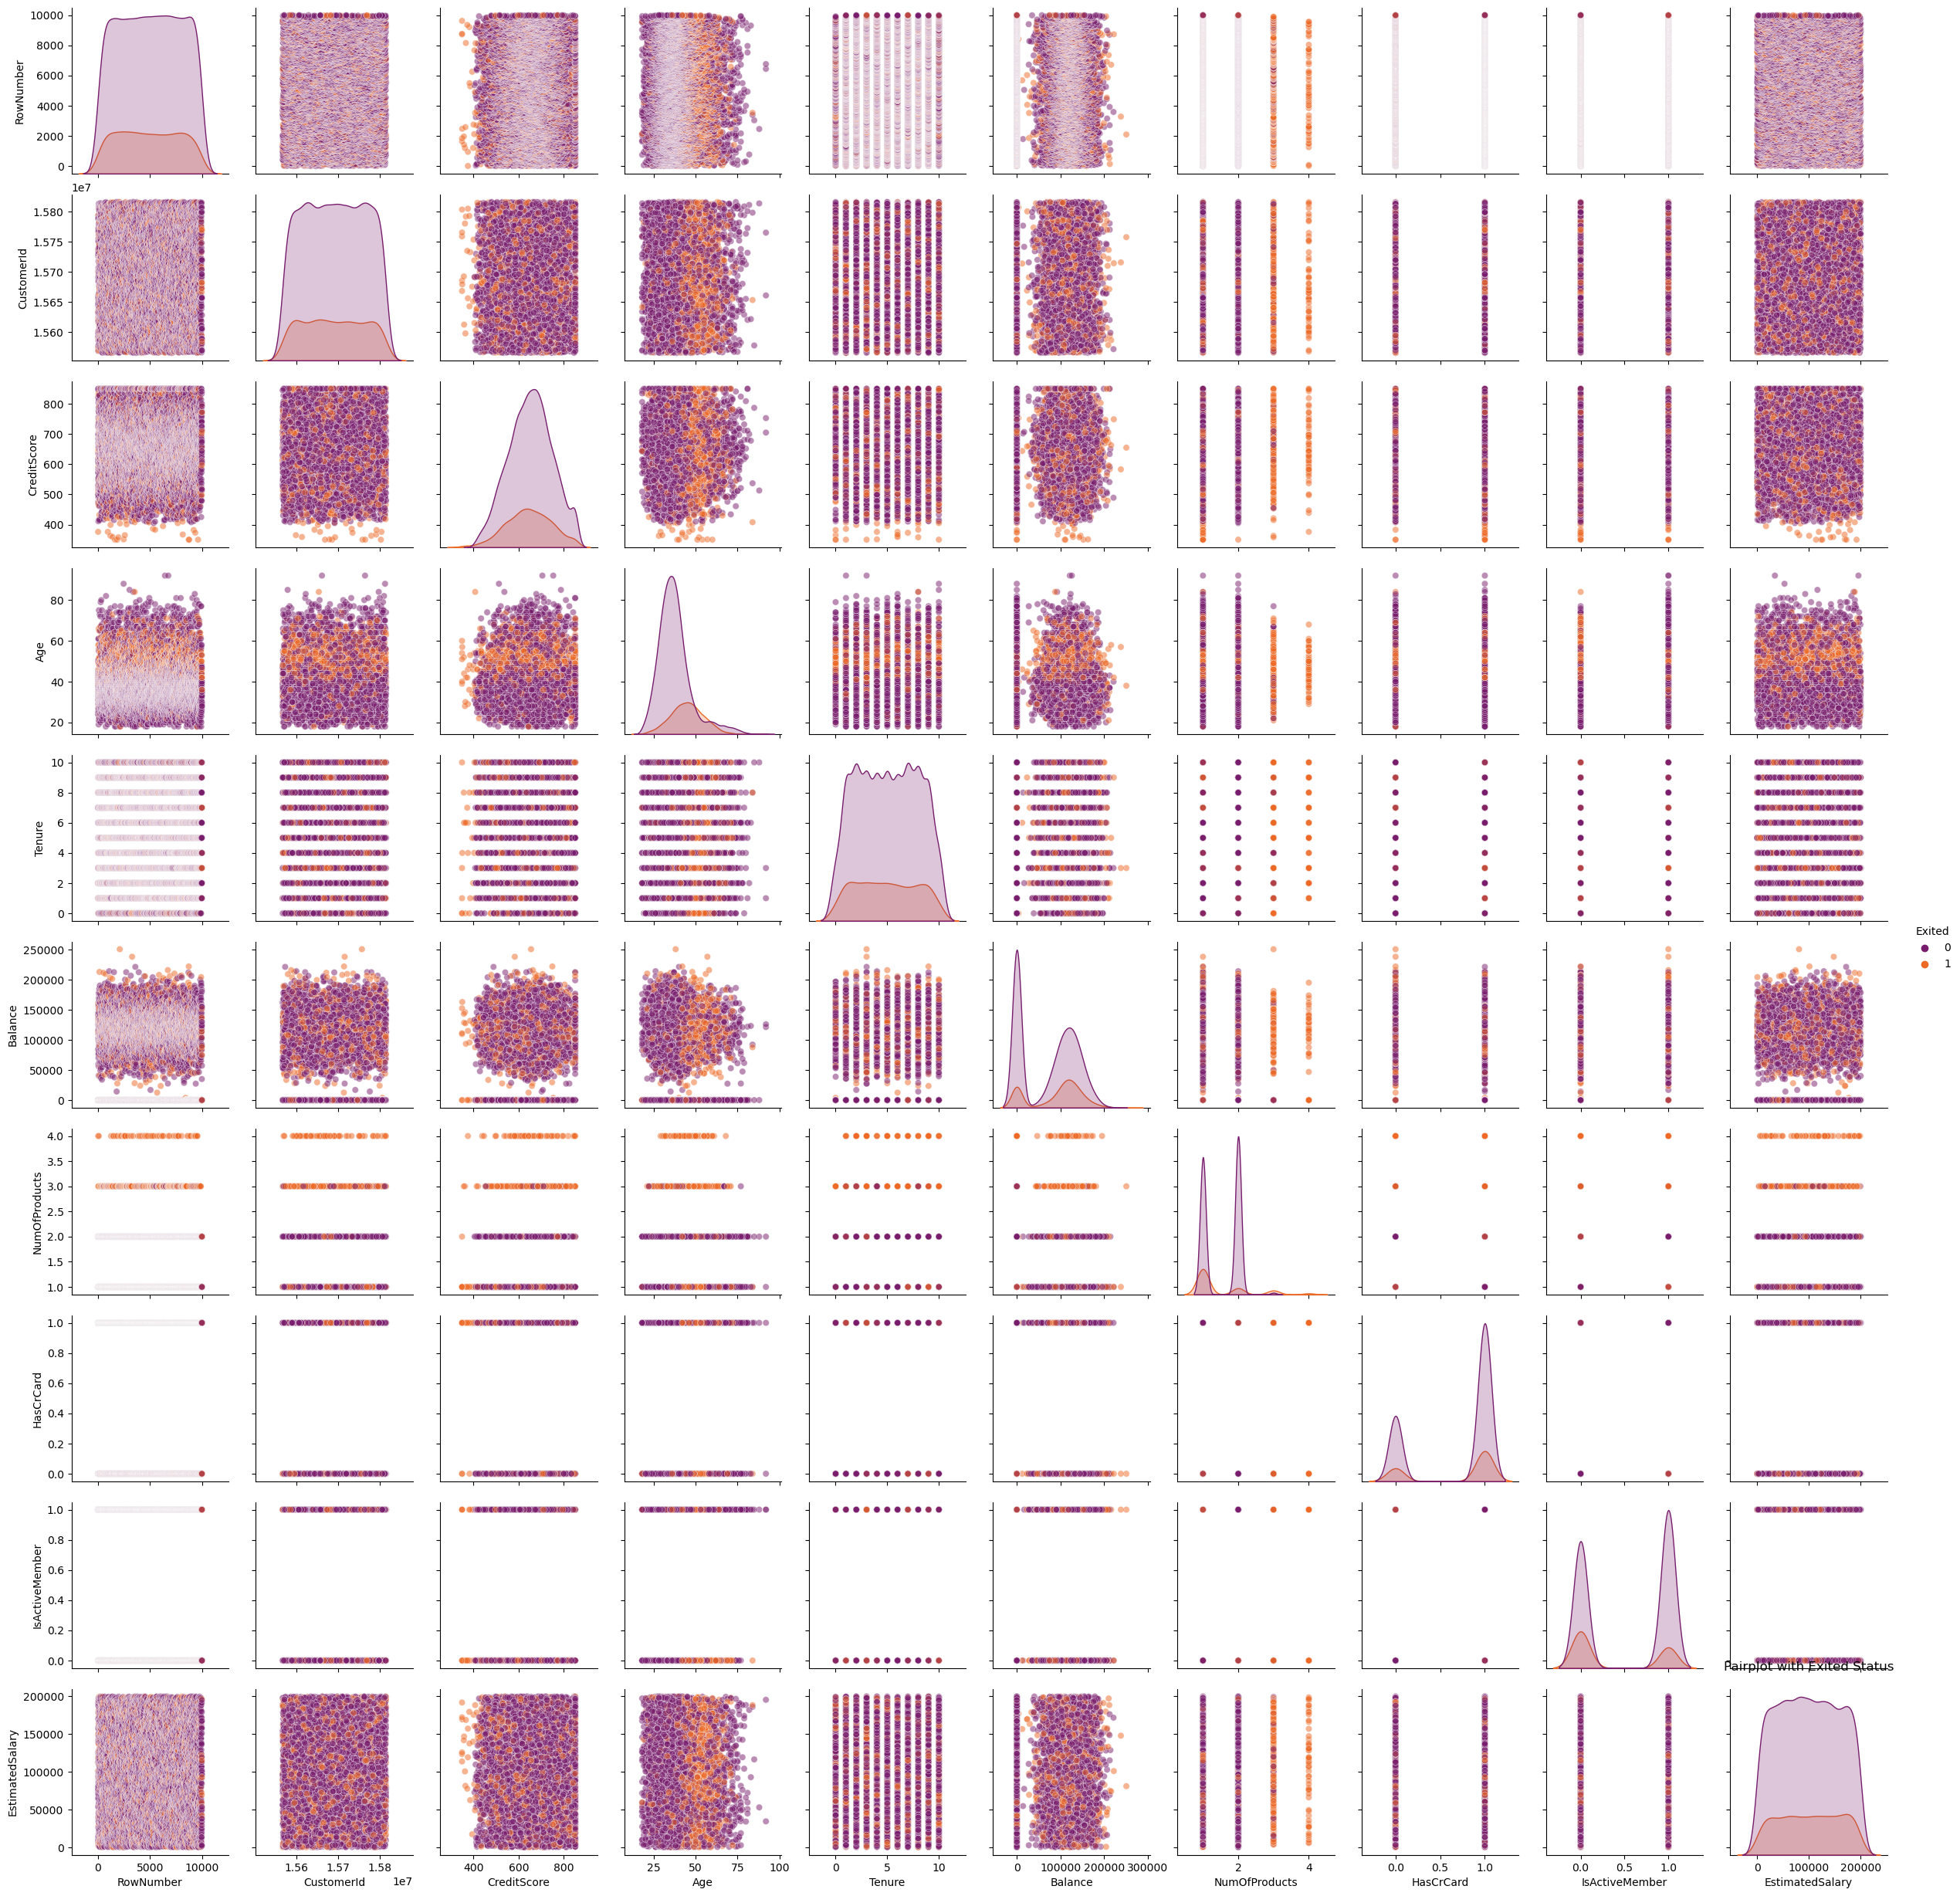

In [15]:
pairplot = sns.pairplot(df, hue='Exited', palette='inferno', plot_kws={'alpha':0.5})
plt.title('Pairplot with Exited Status')
plt.show()

#### BARCHART

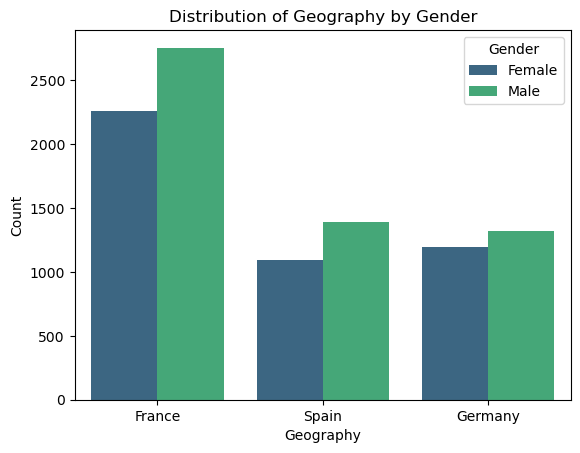

In [16]:
sns.countplot(x='Geography', hue='Gender', data=df, palette='viridis')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('Distribution of Geography by Gender')
plt.show()

#### HEAT MAP

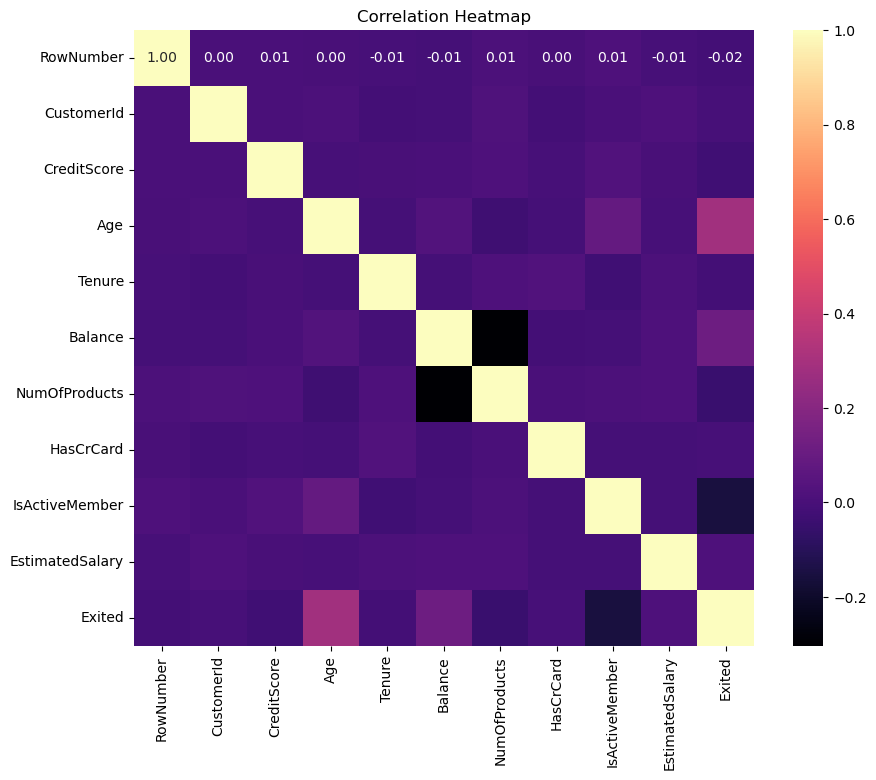

In [17]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### DATA PREPROCESSING

#### ENCODING AND TRANSFORMING DATA

In [18]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)
df = pd.get_dummies(df,drop_first = True)
df = df.astype(int)

In [19]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [20]:
X = df.drop('Exited',axis=1)
y = df['Exited']

### SPLITTING DATA FOR TEST AND TRAIN

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
sc = StandardScaler()
x_tr = sc.fit_transform(X_train)
x_ts = sc.transform(X_test)

In [23]:
val = 0.5
y_tr = [1 if value > val else 0 for value in y_train]

### BUILDING MODELS

#### LOGISTIC REGRESSION

In [24]:
lr_model = LogisticRegression()
lr_model.fit(x_tr,y_tr)

LogisticRegression()

In [25]:
lr_accuracy = lr_model.score(x_tr, y_tr)
lr_y_pred = lr_model.predict(X_test)

C:\Anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [26]:
print("Logistic Regression Model")
print(f"Accuracy: {lr_accuracy:.2%}")
print(classification_report(y_test, lr_y_pred))

Logistic Regression Model
Accuracy: 81.14%
              precision    recall  f1-score   support

           0       0.83      0.00      0.01      1607
           1       0.20      1.00      0.33       393

    accuracy                           0.20      2000
   macro avg       0.51      0.50      0.17      2000
weighted avg       0.71      0.20      0.07      2000



#### RANDOM FOREST

In [27]:
rf_model = RandomForestClassifier()
rf_model.fit(x_tr, y_tr)

RandomForestClassifier()

In [28]:
rf_accuracy= rf_model.score(x_tr, y_tr)
rf_y_pred = rf_model.predict(X_test)

C:\Anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [29]:
print("Random Forest Classifier Model")
print(f"Accuracy: {rf_accuracy:.2%}")
print(classification_report(y_test, rf_y_pred))

Random Forest Classifier Model
Accuracy: 100.00%
              precision    recall  f1-score   support

           0       0.74      0.47      0.58      1607
           1       0.12      0.31      0.18       393

    accuracy                           0.44      2000
   macro avg       0.43      0.39      0.38      2000
weighted avg       0.62      0.44      0.50      2000



#### GRADIENT BOOST

In [30]:
gbc_model = GradientBoostingClassifier()
gbc_model.fit(x_tr, y_tr)

GradientBoostingClassifier()

In [31]:
gbc_accuracy = gbc_model.score(x_tr, y_tr)
gbc_y_pred = gbc_model.predict(X_test)

C:\Anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [32]:
print("Gradient Boosting Classifier Model")
print(f"Accuracy: {gbc_accuracy:.2%}")
print(classification_report(y_test, gbc_y_pred))

Gradient Boosting Classifier Model
Accuracy: 87.29%
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1607
           1       0.17      0.09      0.12       393

    accuracy                           0.74      2000
   macro avg       0.49      0.49      0.48      2000
weighted avg       0.68      0.74      0.70      2000



### VISUALIZING THE ACCURACIES

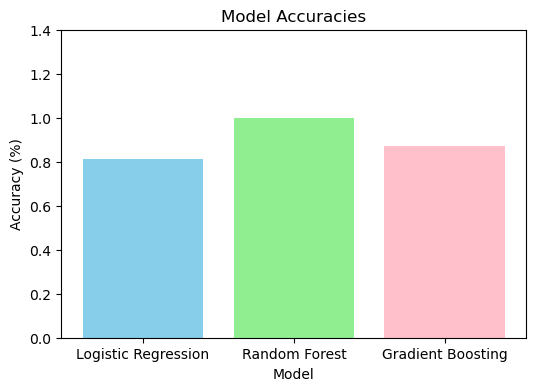

In [33]:
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracies = [lr_accuracy, rf_accuracy, gbc_accuracy]
accuracy_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})
plt.figure(figsize=(6, 4))
plt.bar(accuracy_df['Model'], accuracy_df['Accuracy'], color=['skyblue','lightgreen','pink'])
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0,1.4) 
plt.show()

### PREDICTION

In [34]:
def predict_churn(input_data):
    input_features = sc.transform(input_data)
    churn_prediction = lr_model.predict(input_features)  
    return churn_prediction

In [35]:
def predict_churn_from_input():
    credit_score = int(input("Enter the customer's credit score: "))
    geography = input("Enter the customer's geography (France, Germany, Spain): ")
    gender = input("Enter the customer's gender (Male, Female): ")
    age = int(input("Enter the customer's age: "))
    tenure = int(input("Enter the customer's tenure (in years): "))
    balance = float(input("Enter the customer's account balance: "))
    num_of_products = int(input("Enter the number of bank products used by the customer: "))
    has_cr_card = int(input("Does the customer have a credit card? (Enter 1 for yes, 0 for no): "))
    is_active_member = int(input("Is the customer an active member? (Enter 1 for yes, 0 for no): "))
    estimated_salary = float(input("Enter the customer's estimated salary: "))

    input_data = pd.DataFrame({
        'CreditScore': [credit_score],
        'Geography': [geography],
        'Gender': [gender],
        'Age': [age],
        'Tenure': [tenure],
        'Balance': [balance],
        'NumOfProducts': [num_of_products],
        'HasCrCard': [has_cr_card],
        'IsActiveMember': [is_active_member],
        'EstimatedSalary': [estimated_salary]
    })

    input_data = pd.get_dummies(input_data, columns=['Geography', 'Gender'])
    input_data = input_data.reindex(columns=X.columns, fill_value=0)
    input_features = sc.transform(input_data)

    churn_prediction = predict_churn(input_features)
    churn_prediction_human_readable = np.where(churn_prediction == 1, 'Churn', 'No Churn')

    print(f"The predicted churn status for the customer is: {churn_prediction_human_readable[0]}")

In [36]:
predict_churn_from_input()

Enter the customer's credit score:  200
Enter the customer's geography (France, Germany, Spain):  Spain
Enter the customer's gender (Male, Female):  male
Enter the customer's age:  26
Enter the customer's tenure (in years):  5
Enter the customer's account balance:  20000
Enter the number of bank products used by the customer:  3
Does the customer have a credit card? (Enter 1 for yes, 0 for no):  1
Is the customer an active member? (Enter 1 for yes, 0 for no):  1
Enter the customer's estimated salary:  400000


The predicted churn status for the customer is: No Churn


C:\Anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
